In [1]:
import numpy as np
import pandas as pd


In [2]:
import pandas as pd


encodings = ['utf-8', 'latin1', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass


the basic dataframe line kept giving errors so, tried this code segment after google research which worked. 

In [3]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2570,ham,From 5 to 2 only my work timing.,NaN,NaN,NaN
3636,ham,You know what hook up means right?,NaN,NaN,NaN
3321,ham,Ok darlin i supose it was ok i just worry too ...,NaN,NaN,NaN
3255,ham,Who were those people ? Were you in a tour ? I...,NaN,NaN,NaN
3992,ham,Nimbomsons. Yep phone knows that one. Obviousl...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

#  1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop the unnecessary columns

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5502,ham,Apo all other are mokka players only
47,ham,"Fair enough, anything going on?"
3505,ham,Nite...
4047,ham,Lol or I could just starve and lose a pound by...
4907,ham,"I'm in solihull, | do you want anything?"


Renaming the cols

In [8]:
df.rename(columns={'v1':'prediction','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,prediction,text
3547,ham,Single line with a big meaning::::: \Miss anyt...
4805,ham,Call me when u finish then i come n pick u.
660,ham,"Under the sea, there lays a rock. In the rock,..."
1995,ham,Shall i come to get pickle
3996,spam,Bored housewives! Chat n date now! 0871750.77....


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['prediction'] = encoder.fit_transform(df['prediction'])
df.head()

,prediction,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Missing value check

In [11]:
df.isnull().sum()

prediction    0
text          0
dtype: int64

Duplicate value check

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

## 2. EDA

In [15]:
df.head()

,prediction,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['prediction'].value_counts()

prediction
0    4516
1     653
Name: count, dtype: int64

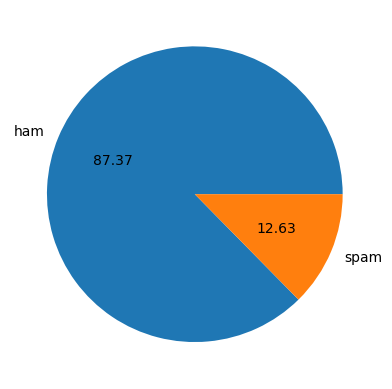

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['prediction'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data seems to be imbalanced

In [18]:
import nltk


In [19]:
!pip install nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['characters'] = df['text'].apply(len)

In [22]:
df.head()

,prediction,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:

df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,prediction,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,prediction,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# ham
df[df['prediction'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['prediction'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

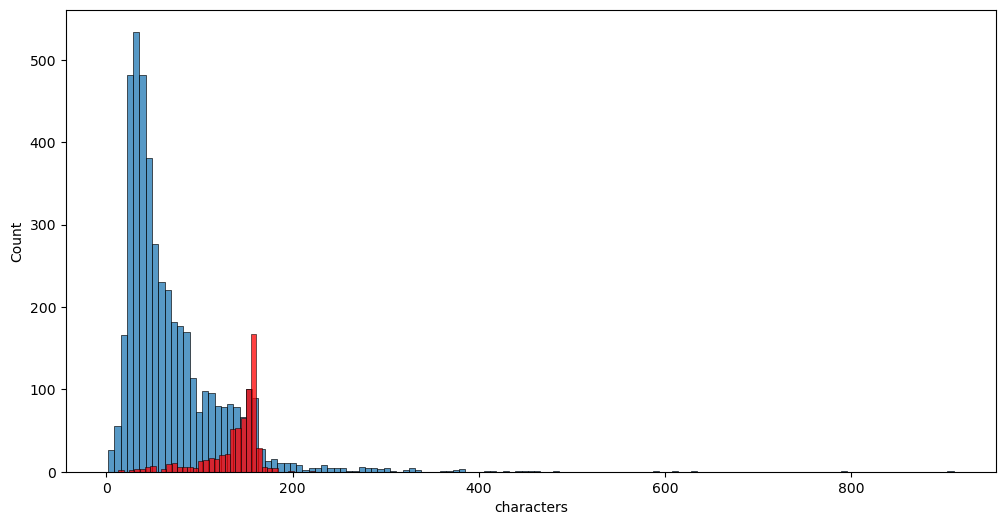

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['prediction'] == 0]['characters'])
sns.histplot(df[df['prediction'] == 1]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

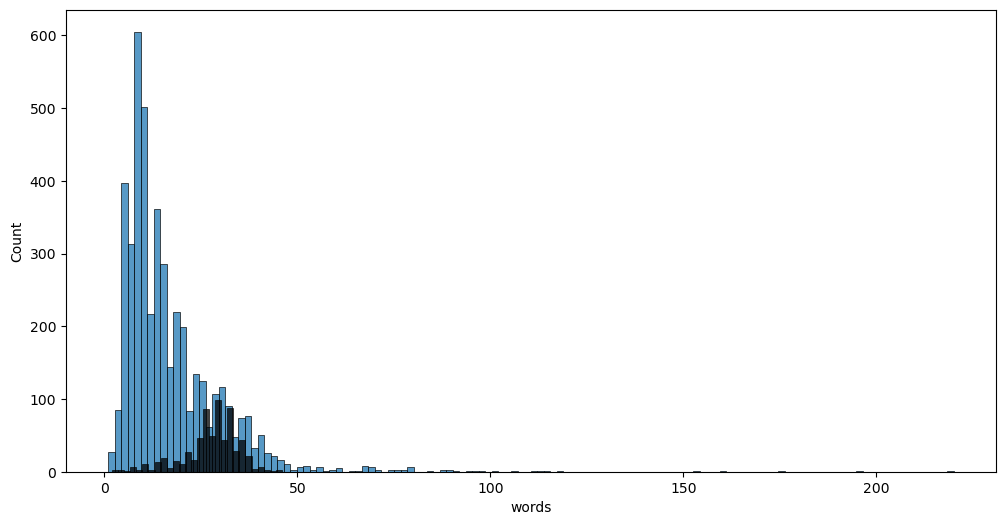

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['prediction'] == 0]['words'])
sns.histplot(df[df['prediction'] == 1]['words'],color='black')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


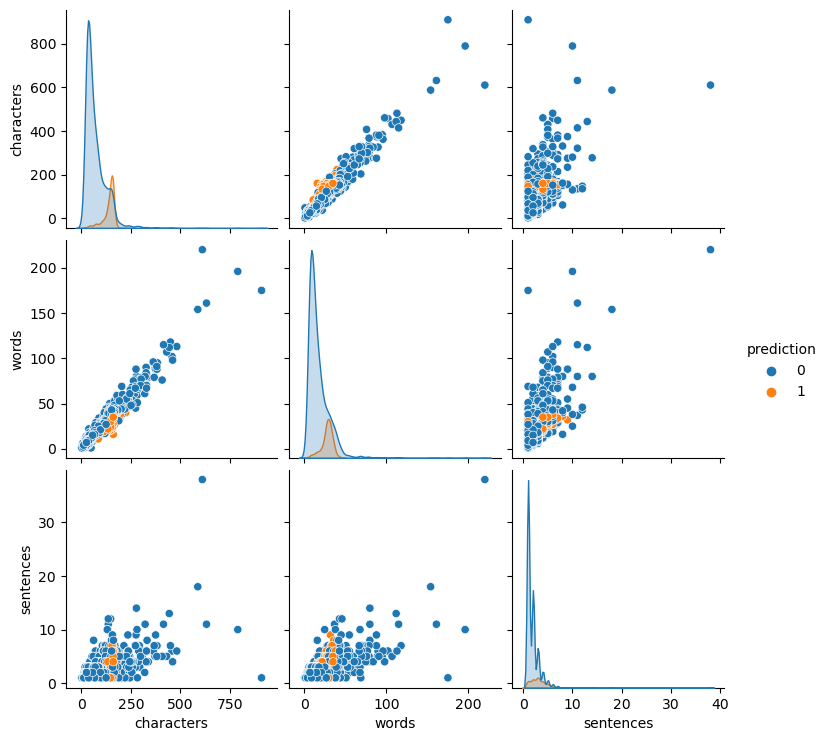

In [33]:
sns.pairplot(df,hue='prediction')

<Axes: >

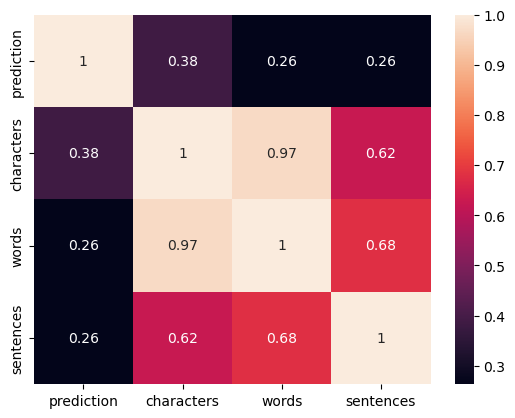

In [34]:
numeric_columns = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True)


# 3. Data Preprocessing
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import re

def detect_spam_words(text):
    words = text.split()  # Split the text into words
    
    fixed_words = []
    current_fixed_word = ""

    for word in words:
        # Check if the word contains '/' or '*'
        if '/' in word or '*' in word:
            # Remove '/' and '*' characters and append the word to the current fixed word
            current_fixed_word += re.sub(r'[/\*]', '', word)
        else:
            # If it's not a word containing '/', add the current fixed word (if any) to the list
            if current_fixed_word:
                fixed_words.append(current_fixed_word)
                current_fixed_word = ""  # Reset the current fixed word
            fixed_words.append(word)

    # Append the last current fixed word (if any) to the list
    if current_fixed_word:
        fixed_words.append(current_fixed_word)

    return ' '.join(fixed_words)

#in dataset,pal es tine
#now palestine

In [37]:
detect_spam_words("I support pal/es*tine")

'I support palestine'

In [38]:
df['detect_text'] = df['text'].apply(detect_spam_words)

In [39]:
df.head()

,prediction,text,characters,words,sentences,detect_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(detect_text):
    if isinstance(detect_text, str):
        detect_text = detect_text.lower()
        detect_text = nltk.word_tokenize(detect_text)

        y = []
        for i in detect_text:
            if i.isalnum():
                y.append(i)

        detect_text = y[:]
        y.clear()

        for i in detect_text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)

        detect_text = y[:]
        y.clear()

        for i in detect_text:
            y.append(ps.stem(i))

        return " ".join(y)
    else:
        return ""  # Return an empty string if 'detect_text' is not a string


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')

'care'

In [44]:
df['transformed_text'] = df['detect_text'].apply(transform_text)

In [45]:
df.head()

,prediction,text,characters,words,sentences,detect_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


WordCloud

In [46]:
!pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['prediction'] == 1]['transformed_text'].str.cat(sep=" "))


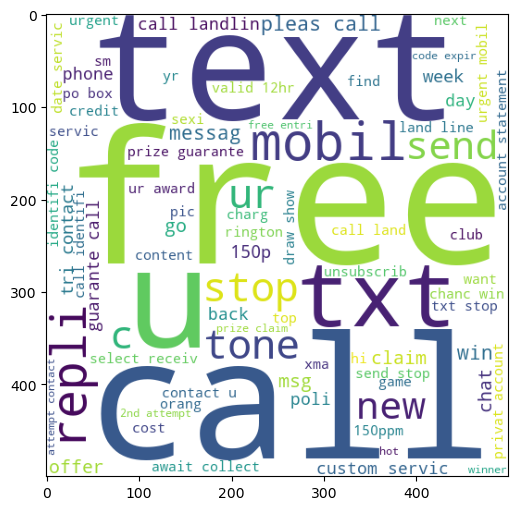

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['prediction'] == 0]['transformed_text'].str.cat(sep=" "))


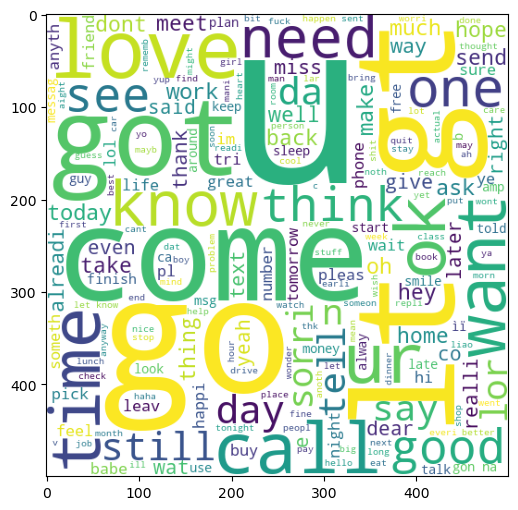

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()


,prediction,text,characters,words,sentences,detect_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['prediction'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [53]:
len(spam_corpus)


10085

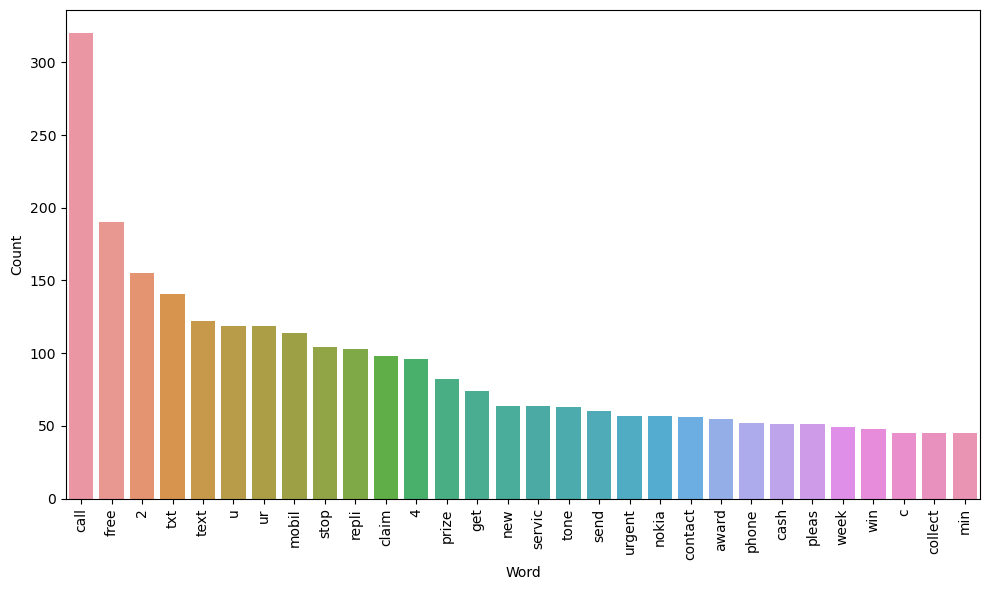

In [54]:
from collections import Counter

# Assuming spam_corpus contains the list of words as generated previously

# Create a Counter object to count word occurrences
word_counter = Counter(spam_corpus)

# Extract the 30 most common words and their counts
common_words = dict(word_counter.most_common(30))

# Create a DataFrame from the Counter object to plot
word_df = pd.DataFrame(list(common_words.items()), columns=['Word', 'Count'])

# Plotting using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [55]:
ham_corpus = []
for msg in df[df['prediction'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)


35399

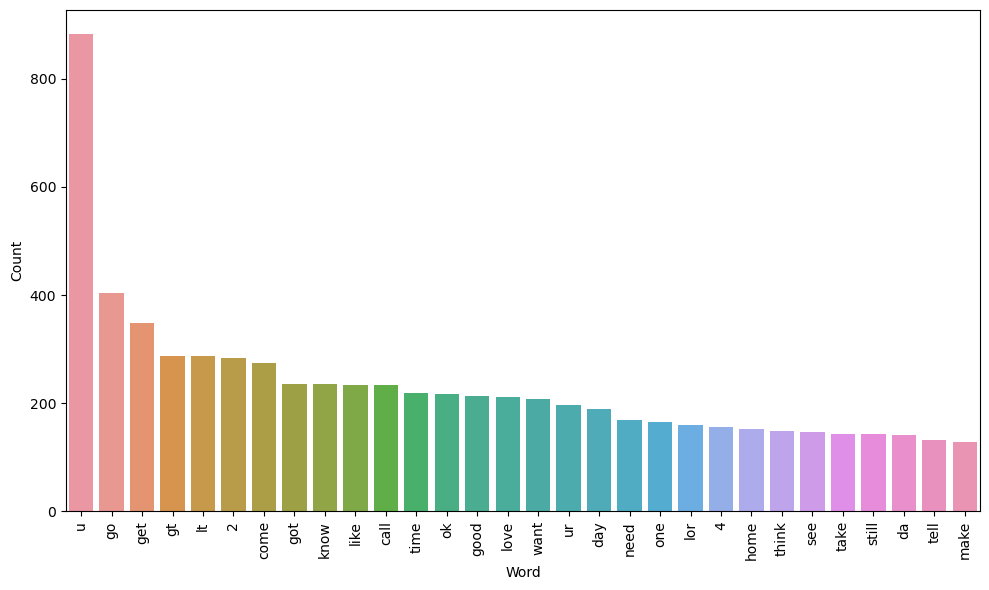

In [57]:
from collections import Counter

# Assuming ham_corpus contains the list of words

# Create a Counter object to count word occurrences in ham_corpus
word_counter = Counter(ham_corpus)

# Extract the 30 most common words and their counts
common_words = dict(word_counter.most_common(30))

# Create a DataFrame from the Counter object to plot
word_df = pd.DataFrame(list(common_words.items()), columns=['Word', 'Count'])

# Plotting using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


# Text Vectorization
# using Bag of Words


In [58]:
df.head()


,prediction,text,characters,words,sentences,detect_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


# 4. Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [62]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape


(5169, 3000)

In [64]:
y = df['prediction'].values


In [65]:
from sklearn.model_selection import train_test_split


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8665377176015474
[[784 112]
 [ 26 112]]
0.5


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [72]:
# Run this cell in your Jupyter Notebook
!pip install xgboost


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy, precision, recall


In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865, 0.8405797101449275)

In [78]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("Recall - ", current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
Recall -  0.8405797101449275
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
Recall -  0.2826086956521739
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
Recall -  0.8043478260869565
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
Recall -  0.6159420289855072
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
Recall -  0.6956521739130435
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
Recall -  0.8333333333333334
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.956140350877193
Recall -  0.7898550724637681
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8549618320610687
Recall -  0.8115942028985508
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
Recall -  0.855072463768116
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
Recall -  0.6739130434782609
For  xgb
Accuracy -  0.9700193423597679
Precision

In [79]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}).sort_values('Precision', ascending=False)


In [80]:
performance_df


,Algorithm,Accuracy,Precision,Recall
1,KN,0.904255,1.000000,0.282609
2,NB,0.973888,1.000000,0.804348
8,ETC,0.977756,0.975207,0.855072
0,SVC,0.975822,0.974790,0.840580
5,RF,0.974855,0.974576,0.833333
4,LR,0.955513,0.960000,0.695652
10,xgb,0.970019,0.957265,0.811594
6,AdaBoost,0.967118,0.956140,0.789855
9,GBDT,0.949710,0.930000,0.673913
7,BgC,0.956480,0.854962,0.811594


In [81]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [82]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.973888
2,ETC,Accuracy,0.977756
3,SVC,Accuracy,0.975822
4,RF,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.970019
7,AdaBoost,Accuracy,0.967118
8,GBDT,Accuracy,0.949710
9,BgC,Accuracy,0.956480


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


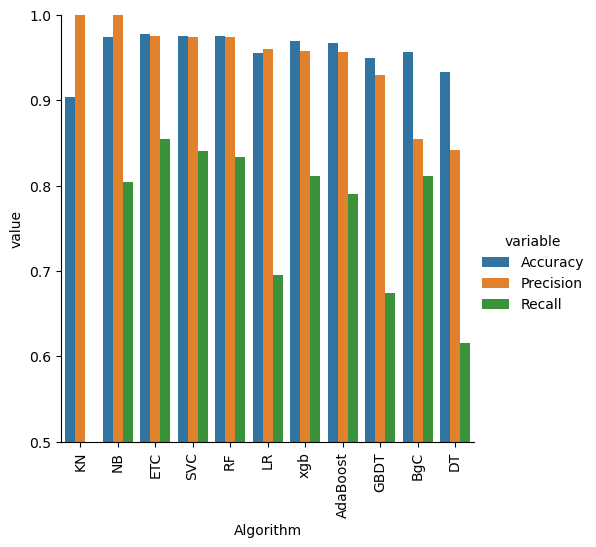

In [83]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# Assuming performance_df1 contains columns: 'Algorithm', 'variable', 'value'
# Filter the DataFrame to get Precision and Recall values
precision_recall_df = performance_df1[performance_df1['variable'].isin(['Precision', 'Recall'])]

# Pivot the DataFrame to have Precision and Recall as separate columns
pivot_precision_recall = precision_recall_df.pivot(index='Algorithm', columns='variable', values='value').reset_index()

# Calculate F1 score
pivot_precision_recall['F1 Score'] = 2 * (pivot_precision_recall['Precision'] * pivot_precision_recall['Recall']) / (pivot_precision_recall['Precision'] + pivot_precision_recall['Recall'])

# Display the DataFrame with Precision, Recall, and F1 scores
print(pivot_precision_recall[['Algorithm', 'Precision', 'Recall', 'F1 Score']])


variable Algorithm  Precision    Recall  F1 Score
0         AdaBoost   0.956140  0.789855  0.865079
1              BgC   0.854962  0.811594  0.832714
2               DT   0.841584  0.615942  0.711297
3              ETC   0.975207  0.855072  0.911197
4             GBDT   0.930000  0.673913  0.781513
5               KN   1.000000  0.282609  0.440678
6               LR   0.960000  0.695652  0.806723
7               NB   1.000000  0.804348  0.891566
8               RF   0.974576  0.833333  0.898438
9              SVC   0.974790  0.840580  0.902724
10             xgb   0.957265  0.811594  0.878431


# Model improve
# 1. Change the max_features parameter of TfIdf


In [85]:
temp_df_max_ft_3000 = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores,
    'Recall_max_ft_3000': recall_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

In [86]:
temp_df_scaling = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores,
    'Recall_scaling': recall_scores
}).sort_values('Precision_scaling', ascending=False)

In [87]:
temp_df_num_chars = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores,
    'Recall_num_chars': recall_scores
}).sort_values('Precision_num_chars', ascending=False)

In [88]:
new_df = performance_df.merge(temp_df_max_ft_3000, on='Algorithm')


In [89]:
new_df = new_df.merge(temp_df_scaling, on='Algorithm', suffixes=('_max_ft_3000', '_scaling'))


In [90]:
new_df_scaled = new_df.merge(temp_df_num_chars, on='Algorithm')


In [91]:
print(new_df_scaled)


   Algorithm  Accuracy  Precision    Recall  Accuracy_max_ft_3000  \
0         KN  0.904255   1.000000  0.282609              0.904255   
1         NB  0.973888   1.000000  0.804348              0.973888   
2        ETC  0.977756   0.975207  0.855072              0.977756   
3        SVC  0.975822   0.974790  0.840580              0.975822   
4         RF  0.974855   0.974576  0.833333              0.974855   
5         LR  0.955513   0.960000  0.695652              0.955513   
6        xgb  0.970019   0.957265  0.811594              0.970019   
7   AdaBoost  0.967118   0.956140  0.789855              0.967118   
8       GBDT  0.949710   0.930000  0.673913              0.949710   
9        BgC  0.956480   0.854962  0.811594              0.956480   
10        DT  0.933269   0.841584  0.615942              0.933269   

    Precision_max_ft_3000  Recall_max_ft_3000  Accuracy_scaling  \
0                1.000000            0.282609          0.904255   
1                1.000000            

voting classifier

In [92]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [94]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9833333333333333


In [96]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier


In [98]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [99]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))